In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Загрузим датасет Титаник
=====

In [33]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
y = pd.read_csv('titanic/gender_submission.csv')

In [34]:
train.shape

(891, 12)

In [35]:
test.shape

(418, 11)

In [36]:
y = y.drop(['PassengerId'], axis=1)
df = pd.concat([test,y], axis=1)

In [37]:
df_titanic = pd.concat([df, train], axis=0)
df_titanic.shape

(1309, 12)

In [38]:
df_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [39]:
df_titanic['sex_num'] = [1 if x == 'male' else 0 for x in df_titanic['Sex']]
df_titanic['embarked_num'] = [1 if x == 'S' else(2 if x == 'Q' else 0) for x in df_titanic['Embarked']]
df_titanic = df_titanic.drop(['Sex','Embarked','Name','Ticket'], axis=1)
df_titanic = df_titanic.fillna(0)

In [40]:
y = df_titanic[['Survived']]
y.shape

(1309, 1)

In [41]:
Xcut = df_titanic[['Pclass', 'sex_num', 'Age', 'SibSp', 'Parch',
        'Fare', 'embarked_num']]
Xcut.shape

(1309, 7)

Загружаем классификатор дерево решений
======

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(Xcut, y, test_size=0.3)

In [59]:
clf = DecisionTreeClassifier(max_depth=5)

In [60]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [61]:
clf.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [62]:
clf.score(X_test, y_test)

0.8600508905852418

In [48]:
clf.predict_proba(X_test)

array([[0.94067797, 0.05932203],
       [0.85      , 0.15      ],
       [0.74045802, 0.25954198],
       [1.        , 0.        ],
       [0.95652174, 0.04347826],
       [0.94067797, 0.05932203],
       [0.91666667, 0.08333333],
       [0.94067797, 0.05932203],
       [0.        , 1.        ],
       [0.94067797, 0.05932203],
       [0.74045802, 0.25954198],
       [0.94067797, 0.05932203],
       [0.74045802, 0.25954198],
       [0.74045802, 0.25954198],
       [0.        , 1.        ],
       [0.94067797, 0.05932203],
       [0.94067797, 0.05932203],
       [0.05357143, 0.94642857],
       [0.05357143, 0.94642857],
       [0.74045802, 0.25954198],
       [0.95454545, 0.04545455],
       [0.85      , 0.15      ],
       [0.05357143, 0.94642857],
       [0.94067797, 0.05932203],
       [0.74045802, 0.25954198],
       [0.125     , 0.875     ],
       [0.94067797, 0.05932203],
       [0.38636364, 0.61363636],
       [1.        , 0.        ],
       [0.10204082, 0.89795918],
       [0.

Подбираем лучшие параметры
======

In [49]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [50]:
def test_clf(clf, X, y, cmap=None, fit_clf=True):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, cmap=cmap or 'spring')
    if fit_clf:
        return clf

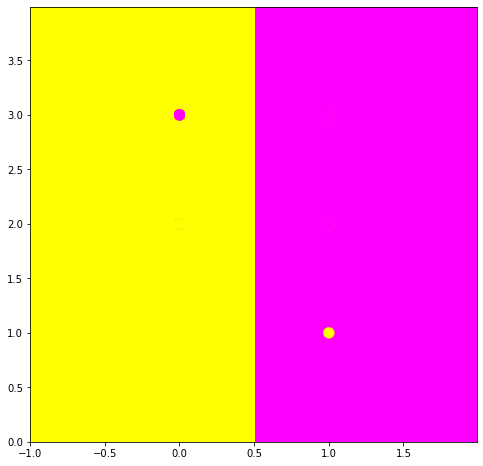

In [51]:
clf = test_clf(DecisionTreeClassifier(max_depth=3), Xcut[['sex_num', 'Pclass']], y.values.reshape(-1), fit_clf=True)

In [63]:
max_d = 0
best_score = 0
for i in range(1,20):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if score > best_score:
        best_score = score
        max_d = i
    print('max_depth {} score {:.2f}'.format(i, score))
print('-'*20)
print('best max_depth - {:.2f}'.format(max_d))

max_depth 1 score 0.87
max_depth 2 score 0.87
max_depth 3 score 0.87
max_depth 4 score 0.87
max_depth 5 score 0.86
max_depth 6 score 0.86
max_depth 7 score 0.84
max_depth 8 score 0.81
max_depth 9 score 0.82
max_depth 10 score 0.81
max_depth 11 score 0.80
max_depth 12 score 0.81
max_depth 13 score 0.79
max_depth 14 score 0.81
max_depth 15 score 0.80
max_depth 16 score 0.79
max_depth 17 score 0.80
max_depth 18 score 0.80
max_depth 19 score 0.79
--------------------
best max_depth - 3.00


Оценка важности фичей
======

''

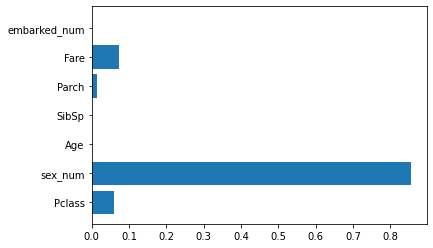

In [64]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(Xcut, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(Xcut.columns)),Xcut.columns)
''

Визуализация
======

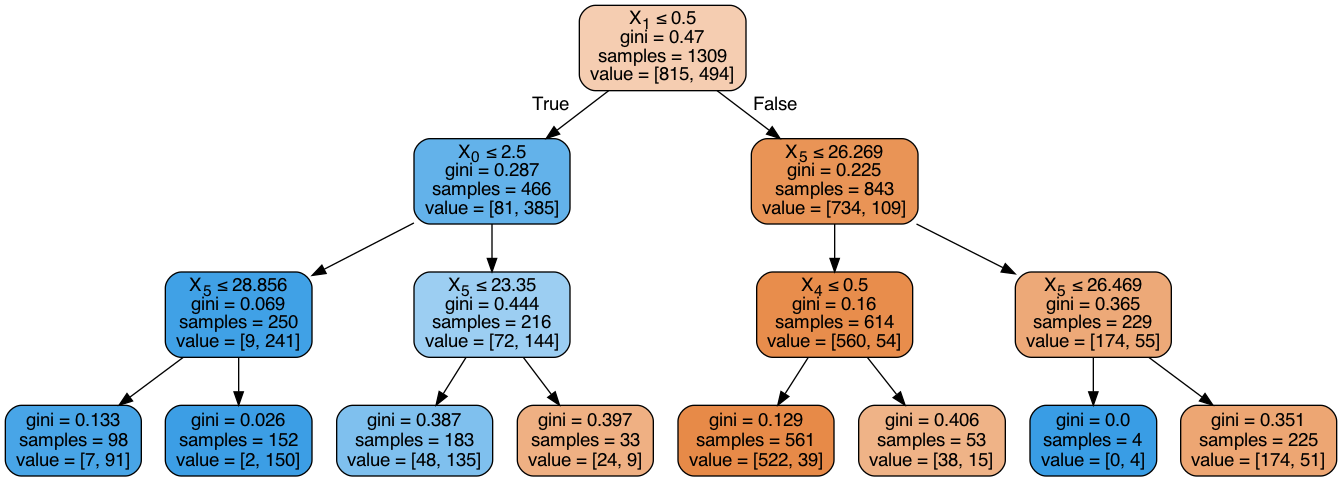

In [65]:
import io
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())